In [2]:
pip install pystan fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=663659 sha256=ec211ad0bc710273ad370afd6f86726abfd463f1e94f5ec4b59c44783ca429a5
  Stored in directory: /Users/zhengyanlin/Library/Caches/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [16]:
df=pd.read_csv('/Users/zhengyanlin/Desktop/notes/prophet_dataset.csv')

In [17]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [6]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [8]:
print(df['Product'].unique())
print(df['Store'].unique())
#single product and store

[2667437]
['QLD_CW_ST0203']


In [9]:
df.dtypes
#time series data need to be a date time value

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [18]:
df['Year']=df['Time Date'].apply(lambda x:str(x)[-4:])
df['Month']=df['Time Date'].apply(lambda x:str(x)[-6:-4])
df['Day']=df['Time Date'].apply(lambda x:str(x)[:-6])
df['ds']=pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [19]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [13]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [20]:
df.drop(['Time Date','Product','Store','Year','Month','Day'], axis=1, inplace=True)
df.columns=['y','ds']

In [21]:
df.head()
#only need two columns; if have multiple products or stores, can use filter method: df[df['Product']='xyz123']

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [22]:
m=Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df)

/Users/zhengyanlin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Initial log joint probability = -33.1653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       1945.54   0.000409428       137.544    4.27e-06       0.001      114  LS failed, Hessian reset 
      99       1946.02    0.00051061       86.4168           1           1      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       1946.15   0.000797427       127.177   9.132e-06       0.001      222  LS failed, Hessian reset 
     197        1946.2   2.62356e-05       65.8608   3.961e-07       0.001      364  LS failed, Hessian reset 
     199        1946.2   4.49997e-06       59.9822      0.5508      0.5508      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258        1946.2   2.30551e-07       45.2252      0.8962      0.8962      439   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

In [25]:
future=m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)
forecast.head()  #to check historical data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3046.999054,748.336627,3984.619615,3046.999054,3046.999054,-624.031580,-624.031580,-624.031580,488.234491,...,16.574517,16.574517,16.574517,-1128.840588,-1128.840588,-1128.840588,0.0,0.0,0.0,2422.967474
1,2018-01-02,3047.573430,764.951035,4109.936573,3047.573430,3047.573430,-634.537113,-634.537113,-634.537113,488.234491,...,-11.319356,-11.319356,-11.319356,-1111.452248,-1111.452248,-1111.452248,0.0,0.0,0.0,2413.036317
2,2018-01-03,3048.147805,887.500509,3981.810313,3048.147805,3048.147805,-609.074121,-609.074121,-609.074121,488.234491,...,-4.438156,-4.438156,-4.438156,-1092.870456,-1092.870456,-1092.870456,0.0,0.0,0.0,2439.073684
3,2018-01-04,3048.722181,977.276543,3969.324934,3048.722181,3048.722181,-562.422146,-562.422146,-562.422146,488.234491,...,22.510201,22.510201,22.510201,-1073.166838,-1073.166838,-1073.166838,0.0,0.0,0.0,2486.300035
4,2018-01-05,3049.296556,852.436827,3985.388731,3049.296556,3049.296556,-598.775077,-598.775077,-598.775077,488.234491,...,-34.543559,-34.543559,-34.543559,-1052.466009,-1052.466009,-1052.466009,0.0,0.0,0.0,2450.521479


In [26]:
forecast.tail() #to check future forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4219.209034,2167.745145,5447.537669,4213.618113,4224.210656,-496.149780,-496.149780,-496.149780,488.234491,...,16.574517,16.574517,16.574517,-1000.958788,-1000.958788,-1000.958788,0.0,0.0,0.0,3723.059253
1176,2021-03-23,4220.287265,2194.823826,5326.685084,4214.627091,4225.358421,-513.571627,-513.571627,-513.571627,488.234491,...,-11.319356,-11.319356,-11.319356,-990.486762,-990.486762,-990.486762,0.0,0.0,0.0,3706.715637
1177,2021-03-24,4221.365495,2128.902892,5327.393523,4215.631781,4226.506186,-498.992129,-498.992129,-498.992129,488.234491,...,-4.438156,-4.438156,-4.438156,-982.788464,-982.788464,-982.788464,0.0,0.0,0.0,3722.373366
1178,2021-03-25,4222.443726,2176.640621,5420.434715,4216.617080,4227.653951,-467.701706,-467.701706,-467.701706,488.234491,...,22.510201,22.510201,22.510201,-978.446398,-978.446398,-978.446398,0.0,0.0,0.0,3754.742020
1179,2021-03-26,4223.521957,2161.025745,5202.391984,4217.603667,4228.860177,-524.267358,-524.267358,-524.267358,488.234491,...,-34.543559,-34.543559,-34.543559,-977.958290,-977.958290,-977.958290,0.0,0.0,0.0,3699.254599


In [27]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2422.967474
1,2018-01-02,2413.036317
2,2018-01-03,2439.073684
3,2018-01-04,2486.300035
4,2018-01-05,2450.521479
...,...,...
1175,2021-03-22,3723.059253
1176,2021-03-23,3706.715637
1177,2021-03-24,3722.373366
1178,2021-03-25,3754.742020


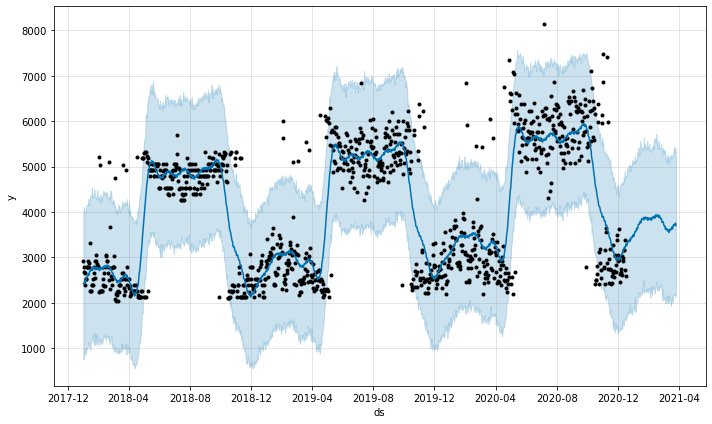

In [28]:
plotl=m.plot(forecast)

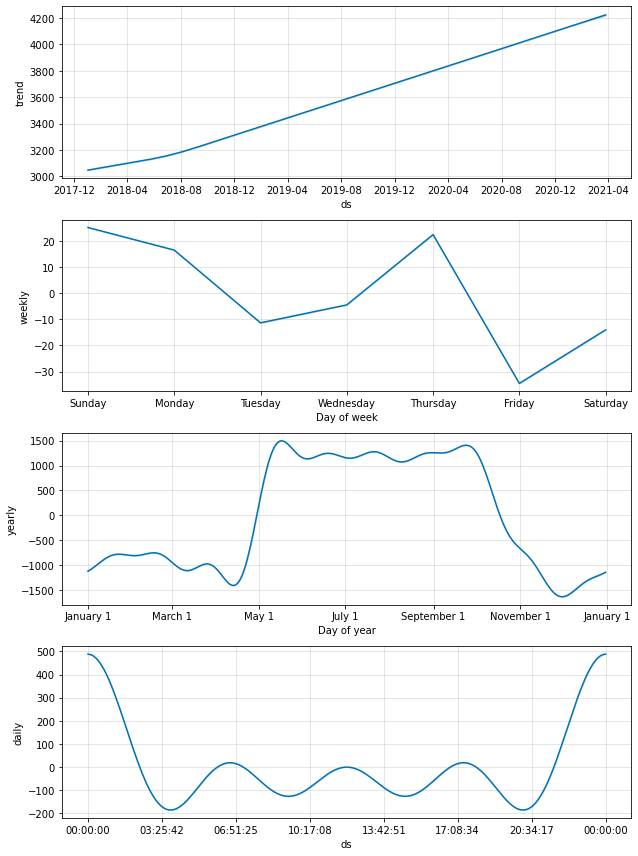

In [29]:
plot2=m.plot_components(forecast)
# to decompose the trend

888